finale Gewichte [1, -3, -4]


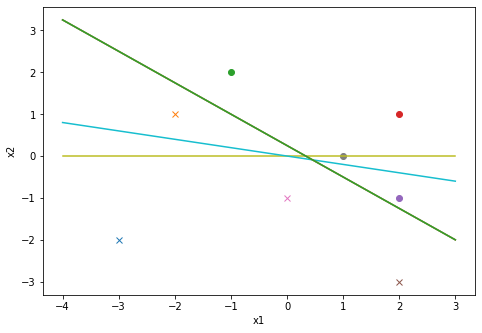

In [7]:
#Neural Network's properities: 
#1. Simple Perceptron with 2 Inputs for a classification problem (classify into 2 given groups(labels))
#2. Binary Step as activationsfunction 
#3. Early Stopping with preset epoch
#4. Learing-Rate = 1


import numpy as np
import matplotlib.pyplot as plt

class Perceptron(object):

    def __init__(self, no_of_inputs, epoch=100, learning_rate=0.01):
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
        self.weights = [0,-1,1]                  #gegeben initiale Gewichte
           
    def predict(self, inputs):
        '''Diese Funktion berechnet die Gewichtssumme der Eingabe 
           und klassifisiert diese Eingabe mithilfe der Threshold Funktion als etnweder Klasse 0 oder Klasse 1'''
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0            
        return activation

    def train(self, training_inputs, labels, ax):
        '''Gewichte werden hier mithilfe des Delta Lernregels angepasst'''
        for _ in range(self.epoch):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)  
        
            #gebe die aktuelle Trennlinie nach jeder Iteration zurück
            x = np.linspace(-4,3,100)        
            ax.plot(x, -((self.weights[1]*x+self.weights[0])/self.weights[2]))
 

                
   


#Eingabe von Inputs und ihre gehörenden erwarteten Klassen
training_inputs = np.array([(-3,-2), (-2,1), (-1,2), (2,1), (2,-1), (2,-3), (0,-1), (1,0)])
labels = [1, 1, 0, 0, 0, 1, 1, 0]


#Initialisiere den Graph mit gegeben Eingaben-Punkten
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set(ylabel='x2', xlabel='x1')
def GraphInitial(training_inputs, labels, ax):       
        for inputs, labels in zip(training_inputs, labels):
            if labels == 0:
                ax.plot(inputs[0],inputs[1],marker="o")
            else: 
                ax.plot(inputs[0],inputs[1],marker="x")
                
GraphInitial(training_inputs, labels, ax)


#Erzeuge eine Perceptron mit 2 Inputs, 5 Epoches und Learning Rate =1 
ExamplePerceptron = Perceptron(2, 5, 1)
ExamplePerceptron.train(training_inputs, labels, ax)
print("finale Gewichte", ExamplePerceptron.weights)

